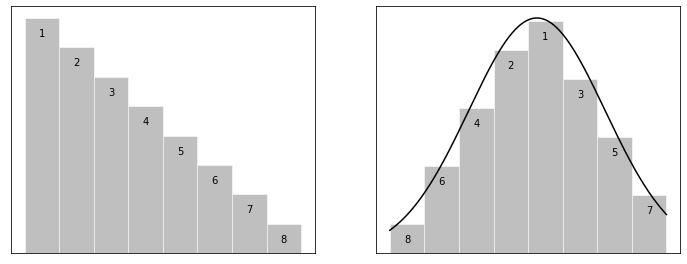

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def show_histogram(d):
    freq, bins, patches = plt.hist(d, bins=np.max(d), label='d', color='gray', alpha=0.5, edgecolor='white')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    for n, (fr, x, patch) in enumerate(zip(freq, bin_centers, patches)):
        plt.annotate(8 - int(freq[n]) + 1,
                     xy=(x, int(freq[n])),
                     xytext=(0, -20),
                     textcoords='offset points',
                     ha='center',
                     va='bottom')

data1 = [1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3,
        3, 3, 3, 4, 4, 4,
        4, 4, 5, 5, 5, 5,
        6, 6, 6, 7, 7, 8]

data2 = [5, 5, 5, 5, 5, 5,
        5, 5, 4, 4, 4, 4,
        4, 4, 4, 6, 6, 6,
        6, 6, 6, 3, 3, 3,
        3, 3, 7, 7, 7, 7,
        2, 2, 2, 8, 8, 1]

plt.subplots(figsize=(12, 10))

plt.subplot(2, 2, 1)
show_histogram(data1);
plt.xticks([], [])
plt.yticks([], [])

x = np.linspace(np.min(data2), np.max(data2), 1000)
mu, std = norm.fit(data2)
p = norm.pdf(x, mu, std)

plt.subplot(2, 2, 2)
show_histogram(data2);
plt.plot(x, p*35, color='black')
plt.xticks([], [])
plt.yticks([], [])

plt.show()

Probability sum: 0.7469020910528843


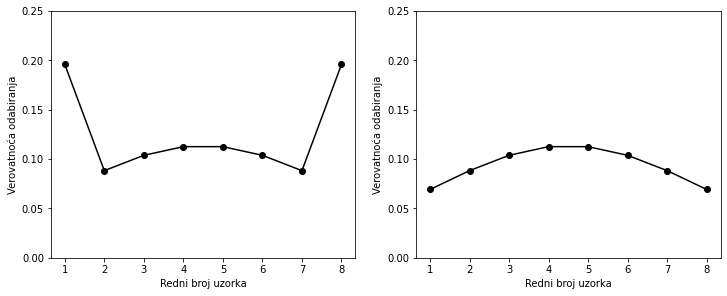

In [ ]:
import math
import matplotlib.pyplot as plt

def cdf(x, mean, std):
    return 0.5 * (1 + math.erf((x - mean)/math.sqrt(2 * std**2)))

m, s = 0, 1
lo, hi = 1, 8
rng = hi - lo
sl, sr = m - s, m + s
step = abs(sr - sl) / rng
diff = step / 2
curr = sl
sum = 0
x, y1, y2 = [], [], []

for i in range(rng + 1):
    xlo, xhi = curr - diff, curr + diff
    ylo, yhi = cdf(xlo, m, s), cdf(xhi, m, s)
    if i == 0:
        prob = yhi
    elif i == rng:
        prob = 1 - ylo
    else:
        prob = yhi - ylo
    x.append(i + 1)
    y1.append(prob)
    y2.append(yhi - ylo)
    sum += yhi - ylo
    curr += step

print('Probability sum:', sum)

plt.subplots(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.ylim(0.0, 0.25)
plt.xlabel('Redni broj uzorka')
plt.ylabel('Verovatnoća odabiranja')
plt.scatter(x, y1, color='black')
plt.plot(x, y1, color='black')

plt.subplot(2, 2, 2)
plt.ylim(0.0, 0.25)
plt.xlabel('Redni broj uzorka')
plt.ylabel('Verovatnoća odabiranja')
plt.scatter(x, y2, color='black')
plt.plot(x, y2, color='black')

plt.show()

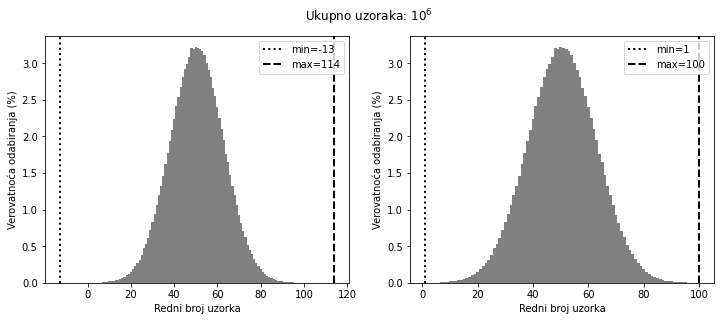

In [41]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def random_norm(a, b):
    x1 = random.uniform(0, 1)
    x2 = random.uniform(0, 1)
    y = math.sqrt(-2 * math.log(x1)) * math.cos(2 * math.pi * x2)
    return round(a + (1 + y * 0.25) * 0.5 * (b - a))

def count_samples(s):
    c = Counter(s)
    for k in c:
        c[k] = c[k] / size * 100
    return c

a, b, size = 1, 100, 1000000

plt.subplots(figsize=(12, 10))
plt.suptitle('Ukupno uzoraka: $10^6$', y=0.92)
s1 = [random_norm(a, b) for _ in range(size)]
c1 = count_samples(s1)
min1, max1 = np.min(s1), np.max(s1)

plt.subplot(2, 2, 1)
plt.xlabel('Redni broj uzorka')
plt.ylabel('Verovatnoća odabiranja (%)')
plt.bar(c1.keys(), c1.values(), width=1.0, color='gray')
plt.axvline(min1, linestyle='dotted', linewidth=2, color='black')
plt.axvline(max1, linestyle='dashed', linewidth=2, color='black')
plt.legend(['min=' + str(min1), 'max=' + str(max1)])

s2 = [x if a <= x <= b else random.randint(a, b) for x in s1]
c2 = count_samples(s2)
min2, max2 = np.min(s2), np.max(s2)

plt.subplot(2, 2, 2)
plt.xlabel('Redni broj uzorka')
plt.ylabel('Verovatnoća odabiranja (%)')
plt.bar(c2.keys(), c2.values(), width=1.0, color='gray')
plt.axvline(min2, linestyle='dotted', linewidth=2, color='black')
plt.axvline(max2, linestyle='dashed', linewidth=2, color='black')
plt.legend(['min=' + str(min2), 'max=' + str(max2)])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


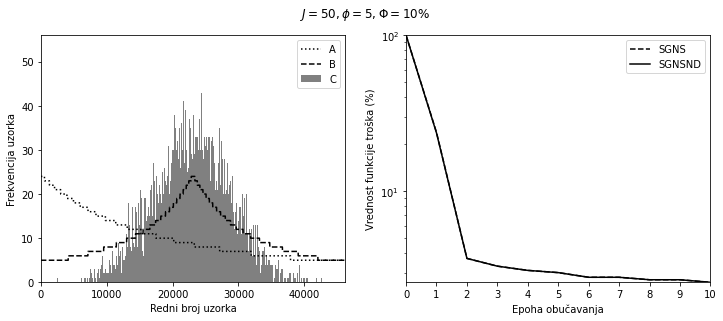

In [40]:
import re
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import brown
from collections import Counter

def reorder(freqs):
    samples = [0] * len(freqs)
    center = len(freqs) // 2 + len(freqs) % 2 - 1
    offset = 0
    right = True
    for p in range(len(freqs)):
        index = center
        if right:
            index += offset
            samples[index] = freqs[p]
            offset += 1
        else:
            index -= offset
            if index < 0:
                index += len(freqs)
            samples[index] = freqs[p]
        right = not right
    return samples

plt.subplots(figsize=(12, 10))
plt.suptitle('$J=50, \phi=5, \Phi=10\%$', y=0.92)

df = pd.read_csv('vocab.tsv', delimiter='\t')
df.columns = ['word', 'frequency']
df = df.sort_values(by=['frequency'], ascending=False)

sum = df['frequency'].sum()
zipf = df['frequency'].tolist()
samples = reorder(zipf)
dist = [random_norm(0, len(samples)) for _ in range(sum)]
dist = [x if 0 <= x <= len(samples) else random.randint(0, len(samples)) for x in dist]
dc = Counter(dist)

plt.subplot(2, 2, 1)
plt.xlabel('Redni broj uzorka')
plt.ylabel('Frekvencija uzorka')
plt.ylim(0, max(np.max(samples), dc.most_common(1)[0][1]))
plt.xlim(0, len(samples))
plt.plot(zipf, label='A', linestyle='dotted', color='black')
plt.plot(samples, label='B', linestyle='dashed', color='black')
plt.bar(dc.keys(), dc.values(), label='C', width=1.0, color='gray')
plt.legend()

logs = {'SGNS': ['dashed', '''[09-06-2021 16:03:02.629] INFO: Loss 4484072.714315 (100.0%)
[09-06-2021 16:03:10.495] INFO: Loss 1068925.738090 (23.8%)
[09-06-2021 16:03:17.351] INFO: Loss 165323.804105 (3.7%)
[09-06-2021 16:03:22.757] INFO: Loss 147804.712381 (3.3%)
[09-06-2021 16:03:27.686] INFO: Loss 139555.522243 (3.1%)
[09-06-2021 16:03:32.223] INFO: Loss 132857.281672 (3.0%)
[09-06-2021 16:03:36.858] INFO: Loss 127707.008148 (2.8%)
[09-06-2021 16:03:41.990] INFO: Loss 123784.325982 (2.8%)
[09-06-2021 16:03:47.067] INFO: Loss 120825.268276 (2.7%)
[09-06-2021 16:03:51.850] INFO: Loss 118921.058284 (2.7%)
[09-06-2021 16:03:56.650] INFO: Loss 117693.924811 (2.6%)'''],
'SGNSND': ['solid', '''[09-06-2021 15:58:22.668] INFO: Loss 4484072.925337 (100.0%)
[09-06-2021 15:58:27.584] INFO: Loss 1059706.210681 (23.6%)
[09-06-2021 15:58:33.031] INFO: Loss 164113.525892 (3.7%)
[09-06-2021 15:58:38.755] INFO: Loss 148128.795293 (3.3%)
[09-06-2021 15:58:43.513] INFO: Loss 139449.088232 (3.1%)
[09-06-2021 15:58:48.148] INFO: Loss 132356.665971 (3.0%)
[09-06-2021 15:58:53.137] INFO: Loss 127238.180989 (2.8%)
[09-06-2021 15:58:58.480] INFO: Loss 124323.676587 (2.8%)
[09-06-2021 15:59:05.455] INFO: Loss 121276.722628 (2.7%)
[09-06-2021 15:59:13.774] INFO: Loss 120524.700390 (2.7%)
[09-06-2021 15:59:18.394] INFO: Loss 117267.872143 (2.6%)''']}

def plot_loss(epoch, loss, label, style):
    plt.xticks(epoch, epoch)
    plt.xlim(0, np.max(epoch))
    plt.ylim(top=100)
    plt.yscale('log')
    plt.xlabel('Epoha obučavanja')
    plt.ylabel('Vrednost funkcije troška (%)')
    plt.plot(epoch, loss, color='black', label=label, linestyle=style)

plt.subplot(2, 2, 2)

for model, data in logs.items():
    loss, lines = [], data[1].splitlines()
    for i, line in enumerate(lines):
        loss.append(float(re.findall('\d+.\d+', line)[-1]))
    plot_loss(range(len(lines)), loss, model, data[0])

plt.legend()
plt.show()

In [ ]:
# 1
# HIDDEN_MAX 50
# FILTER_LOW_BOUND 5
# FILTER_HIGH_RATIO 0.1
logs = {'SGNS': ['dashed', '''[09-06-2021 16:03:02.629] INFO: Loss 4484072.714315 (100.0%)
[09-06-2021 16:03:10.495] INFO: Loss 1068925.738090 (23.8%)
[09-06-2021 16:03:17.351] INFO: Loss 165323.804105 (3.7%)
[09-06-2021 16:03:22.757] INFO: Loss 147804.712381 (3.3%)
[09-06-2021 16:03:27.686] INFO: Loss 139555.522243 (3.1%)
[09-06-2021 16:03:32.223] INFO: Loss 132857.281672 (3.0%)
[09-06-2021 16:03:36.858] INFO: Loss 127707.008148 (2.8%)
[09-06-2021 16:03:41.990] INFO: Loss 123784.325982 (2.8%)
[09-06-2021 16:03:47.067] INFO: Loss 120825.268276 (2.7%)
[09-06-2021 16:03:51.850] INFO: Loss 118921.058284 (2.7%)
[09-06-2021 16:03:56.650] INFO: Loss 117693.924811 (2.6%)'''],
'SGNSND': ['solid', '''[09-06-2021 15:58:22.668] INFO: Loss 4484072.925337 (100.0%)
[09-06-2021 15:58:27.584] INFO: Loss 1059706.210681 (23.6%)
[09-06-2021 15:58:33.031] INFO: Loss 164113.525892 (3.7%)
[09-06-2021 15:58:38.755] INFO: Loss 148128.795293 (3.3%)
[09-06-2021 15:58:43.513] INFO: Loss 139449.088232 (3.1%)
[09-06-2021 15:58:48.148] INFO: Loss 132356.665971 (3.0%)
[09-06-2021 15:58:53.137] INFO: Loss 127238.180989 (2.8%)
[09-06-2021 15:58:58.480] INFO: Loss 124323.676587 (2.8%)
[09-06-2021 15:59:05.455] INFO: Loss 121276.722628 (2.7%)
[09-06-2021 15:59:13.774] INFO: Loss 120524.700390 (2.7%)
[09-06-2021 15:59:18.394] INFO: Loss 117267.872143 (2.6%)''']}

In [ ]:
# 2
# HIDDEN_MAX 50
# FILTER_LOW_BOUND 5
# FILTER_HIGH_RATIO 0.05
logs = {'SGNS': ['dashed', '''[09-06-2021 15:44:29.282] INFO: Loss 19585877.831532 (100.0%)
[09-06-2021 15:44:47.500] INFO: Loss 2358098.700170 (12.0%)
[09-06-2021 15:45:02.854] INFO: Loss 633367.359577 (3.2%)
[09-06-2021 15:45:24.964] INFO: Loss 551840.603880 (2.8%)
[09-06-2021 15:45:40.480] INFO: Loss 495185.730765 (2.5%)
[09-06-2021 15:45:55.189] INFO: Loss 455197.399890 (2.3%)
[09-06-2021 15:46:10.151] INFO: Loss 424760.733594 (2.2%)
[09-06-2021 15:46:25.950] INFO: Loss 402468.165894 (2.1%)
[09-06-2021 15:46:44.447] INFO: Loss 386072.841195 (2.0%)
[09-06-2021 15:47:03.755] INFO: Loss 376278.153601 (1.9%)
[09-06-2021 15:47:19.092] INFO: Loss 368711.706794 (1.9%)'''],
'SGNSND': ['solid', '''[09-06-2021 15:37:46.444] INFO: Loss 19585878.314372 (100.0%)
[09-06-2021 15:38:02.875] INFO: Loss 2357045.175518 (12.0%)
[09-06-2021 15:38:21.671] INFO: Loss 636823.450599 (3.3%)
[09-06-2021 15:38:41.939] INFO: Loss 550830.988992 (2.8%)
[09-06-2021 15:38:58.288] INFO: Loss 492292.399289 (2.5%)
[09-06-2021 15:39:22.563] INFO: Loss 456693.600800 (2.3%)
[09-06-2021 15:39:51.409] INFO: Loss 425916.482962 (2.2%)
[09-06-2021 15:40:08.649] INFO: Loss 400889.581131 (2.0%)
[09-06-2021 15:40:26.966] INFO: Loss 385013.594943 (2.0%)
[09-06-2021 15:40:41.894] INFO: Loss 372529.555796 (1.9%)
[09-06-2021 15:40:56.188] INFO: Loss 365061.523519 (1.9%)''']}

In [ ]:
# 3
# HIDDEN_MAX 50
# FILTER_LOW_BOUND 5
# FLTER_HIGH_RATIO 0.01
logs = {'SGNS': ['dashed', '''[09-06-2021 16:39:50.444] INFO: Loss 159955250.677196 (100.0%)
[09-06-2021 16:41:49.582] INFO: Loss 9283074.475584 (5.8%)
[09-06-2021 16:43:34.485] INFO: Loss 3399980.536089 (2.1%)
[09-06-2021 16:45:42.560] INFO: Loss 2632724.891079 (1.6%)
[09-06-2021 16:47:57.058] INFO: Loss 2212290.275676 (1.4%)
[09-06-2021 16:49:53.094] INFO: Loss 1956431.145595 (1.2%)
[09-06-2021 16:52:19.523] INFO: Loss 1794700.578620 (1.1%)
[09-06-2021 16:54:34.935] INFO: Loss 1678265.874979 (1.0%)
[09-06-2021 16:56:33.971] INFO: Loss 1599357.044384 (1.0%)
[09-06-2021 16:58:28.910] INFO: Loss 1546309.609533 (1.0%)
[09-06-2021 17:00:12.658] INFO: Loss 1517421.191298 (0.9%)'''],
'SGNSND': ['solid', '''[09-06-2021 16:17:18.058] INFO: Loss 159955251.055690 (100.0%)
[09-06-2021 16:19:31.208] INFO: Loss 9310653.976318 (5.8%)
[09-06-2021 16:21:23.678] INFO: Loss 3412994.986767 (2.1%)
[09-06-2021 16:23:08.234] INFO: Loss 2629410.567647 (1.6%)
[09-06-2021 16:24:52.368] INFO: Loss 2215589.252077 (1.4%)
[09-06-2021 16:26:35.550] INFO: Loss 1962496.473279 (1.2%)
[09-06-2021 16:28:19.713] INFO: Loss 1796891.693927 (1.1%)
[09-06-2021 16:30:08.034] INFO: Loss 1685772.186701 (1.1%)
[09-06-2021 16:31:49.720] INFO: Loss 1604830.972709 (1.0%)
[09-06-2021 16:33:45.383] INFO: Loss 1561012.823836 (1.0%)
[09-06-2021 16:35:29.809] INFO: Loss 1527669.350741 (1.0%)''']}